Key to results data:

**Feature engineering**
```python
df2['HBP']= 10*df2['HY'] + 25*df2['HR']
df2['ABP']= 10*df2['AY'] + 25*df2['AR']

df2['FTHGDif']= df2.FTHG - df2.FTAG
df2['HTHGDif']= df2.HTHG - df2.HTAG

df2['shotsDiff'] = df2.HS - df2.AS
df2['shotsonTargetDiff'] = df2.HST - df2.AST
#df2['hitWoodworkDiff'] = df2.HHW - df2.AHW
df2['cornersDiff'] = df2.HC - df2.AC
df2['foulsCommittedDiff'] = df2.HF - df2.AF
#df2['freeKickConcededDiff'] = df2.HFKC - df2.AFKC
#df2['offsideDiff'] = df2.HO - df2.AO
df2['yellowcardDiff'] = df2.HY - df2.AY
df2['redcardDiff'] = df2.HR - df2.AR
df2['bookingptsDiff'] = df2.HBP - df2.ABP

```
Div = League Division <br>
Date = Match Date (dd/mm/yy)<br>
HomeTeam = Home Team<br>
AwayTeam = Away Team<br>
FTHG and HG = Full Time Home Team Goals<br>
FTAG and AG = Full Time Away Team Goals<br>
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)<br>
HTHG = Half Time Home Team Goals<br>
HTAG = Half Time Away Team Goals<br>
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)<br>
<br>
Match Statistics (where available)<br><br>
Attendance = Crowd Attendance<br>
Referee = Match Referee<br>
HS = Home Team Shots<br>
AS = Away Team Shots<br>
HST = Home Team Shots on Target<br>
AST = Away Team Shots on Target<br>
HHW = Home Team Hit Woodwork<br>
AHW = Away Team Hit Woodwork<br>
HC = Home Team Corners<br>
AC = Away Team Corners<br>
HF = Home Team Fouls Committed<br>
AF = Away Team Fouls Committed<br>
HFKC = Home Team Free Kicks Conceded<br>
AFKC = Away Team Free Kicks Conceded<br>
HO = Home Team Offsides<br>
AO = Away Team Offsides<br>
HY = Home Team Yellow Cards<br>
AY = Away Team Yellow Cards<br>
HR = Home Team Red Cards<br>
AR = Away Team Red Cards<br>
HBP = Home Team Bookings Points (10 = yellow, 25 = red)<br>
ABP = Away Team Bookings Points (10 = yellow, 25 = red)<br>
<br>
<br>
Note that Free Kicks Conceeded includes fouls, offsides and any other offense commmitted and
will always be equal to or higher than the number of fouls. Fouls make up the vast majority
of Free Kicks Conceded. Free Kicks Conceded are shown when specific data on Fouls are not
available (France 2nd, Belgium 1st and Greece 1st divisions).
Note also that English and Scottish yellow cards do not include the initial yellow card when
a second is shown to a player converting it into a red, but this is included as a yellow
(plus red) for European games.

In [1]:
import math
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import scipy.stats as scs
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df = pd.read_csv('data/football_data_co_UK/2016_17_epl.csv')

In [3]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0,1.53,4.5,6.50,1.50,4.60,6.75,1.47,4.5,6.50,1.44,4.40,6.50,1.53,4.55,6.85,1.53,4.2,6.00,1.53,4.50,6.50,41,1.55,1.51,4.60,4.43,6.89,6.44,37,1.65,1.61,2.43,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0,11.00,5.5,1.33,11.00,5.25,1.30,8.00,5.3,1.35,10.00,5.00,1.30,10.95,5.55,1.34,10.00,4.8,1.33,10.00,5.50,1.33,40,11.50,10.10,5.60,5.25,1.36,1.32,35,1.70,1.63,2.40,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0,1.25,6.5,15.00,1.22,6.50,12.50,1.22,6.2,13.50,1.25,5.75,15.00,1.26,6.30,15.25,1.25,5.5,13.00,1.25,6.25,15.00,41,1.27,1.24,6.55,6.06,15.50,13.67,36,1.71,1.66,2.33,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0,1.83,3.6,5.00,1.80,3.50,4.75,1.85,3.5,4.30,1.80,3.40,4.60,1.83,3.58,5.11,1.80,3.3,5.00,1.83,3.60,5.00,41,1.86,1.81,3.65,3.50,5.11,4.82,36,2.19,2.11,1.79,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0,1.70,3.8,5.75,1.70,3.60,5.50,1.70,3.7,5.00,1.67,3.60,5.25,1.70,3.83,5.81,1.70,3.5,5.50,1.70,3.80,5.75,40,1.71,1.69,3.85,3.69,6.00,5.50,35,2.17,2.08,1.80,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42


In [4]:
df.shape

(380, 65)

In [5]:
df2 = df.copy()

In [6]:
df2.columns, len(df2.columns)

(Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
        'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
        'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
        'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA',
        'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH',
        'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5',
        'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH',
        'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
       dtype='object'), 65)

In [7]:
df2.HomeTeam.unique(), len(df2.HomeTeam.unique())

(array(['Arsenal', 'Brighton', 'Chelsea', 'Crystal Palace', 'Everton',
        'Southampton', 'Watford', 'West Brom', 'Man United', 'Newcastle',
        'Bournemouth', 'Burnley', 'Leicester', 'Liverpool', 'Stoke',
        'Swansea', 'Huddersfield', 'Tottenham', 'Man City', 'West Ham'],
       dtype=object), 20)

In [8]:
drop_cols = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD',
        'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA',
        'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH',
        'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5',
        'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH',
        'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA']
df2 = df2.drop(drop_cols, axis=1)

In [9]:
df2.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0
1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0
2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0
3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0
4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0


In [10]:
df2['HBP']= 10*df2['HY'] + 25*df2['HR']
df2['ABP']= 10*df2['AY'] + 25*df2['AR']

In [11]:
df2.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HBP,ABP
0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0,0,10
1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0,0,20
2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0,80,30
3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0,10,30
4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0,10,10


In [12]:
FTR_res_key = {'H':1, 'A':-1, 'D':0}
EPL_res_key = {'H':3, 'A':0, 'D':1}
df2['FTHGDif']= df2.FTHG - df2.FTAG
df2['HTHGDif']= df2.HTHG - df2.HTAG

In [13]:
df2.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HBP,ABP,FTHGDif,HTHGDif
0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0,0,10,1,0
1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0,0,20,-2,0
2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0,80,30,-1,-3
3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0,10,30,-3,-2
4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0,10,10,1,1


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 27 columns):
Div         380 non-null object
Date        380 non-null object
HomeTeam    380 non-null object
AwayTeam    380 non-null object
FTHG        380 non-null int64
FTAG        380 non-null int64
FTR         380 non-null object
HTHG        380 non-null int64
HTAG        380 non-null int64
HTR         380 non-null object
Referee     380 non-null object
HS          380 non-null int64
AS          380 non-null int64
HST         380 non-null int64
AST         380 non-null int64
HF          380 non-null int64
AF          380 non-null int64
HC          380 non-null int64
AC          380 non-null int64
HY          380 non-null int64
AY          380 non-null int64
HR          380 non-null int64
AR          380 non-null int64
HBP         380 non-null int64
ABP         380 non-null int64
FTHGDif     380 non-null int64
HTHGDif     380 non-null int64
dtypes: int64(20), object(7)
memory usage: 80.2+ KB

In [15]:
df2.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HBP,ABP,FTHGDif,HTHGDif
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.531579,1.147368,0.607895,0.515789,13.584211,10.855263,4.626316,3.763158,10.218421,10.478947,5.739474,4.544737,1.478947,1.565789,0.044737,0.057895,15.907895,17.105263,0.384211,0.092105
std,1.340087,1.177793,0.793403,0.756511,5.771439,4.858700,2.706845,2.317015,3.256360,3.336388,2.993047,2.767241,1.256993,1.259639,0.219375,0.233852,13.803347,14.101572,1.895631,1.152920
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-3.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,8.000000,8.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,10.000000,10.000000,-1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.500000,4.000000,3.500000,10.000000,10.000000,5.000000,4.000000,1.000000,1.000000,0.000000,0.000000,10.000000,10.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,12.000000,13.000000,8.000000,6.000000,2.000000,2.000000,0.000000,0.000000,20.000000,30.000000,1.000000,1.000000
max,7.000000,6.000000,4.000000,3.000000,35.000000,30.000000,15.000000,14.000000,19.000000,26.000000,18.000000,13.000000,6.000000,7.000000,2.000000,1.000000,80.000000,70.000000,5.000000,4.000000


In [16]:
df2.groupby('HomeTeam')['HS'].sum()

HomeTeam
Arsenal           341
Bournemouth       267
Brighton          217
Burnley           207
Chelsea           356
Crystal Palace    267
Everton           189
Huddersfield      207
Leicester         227
Liverpool         359
Man City          347
Man United        275
Newcastle         224
Southampton       252
Stoke             203
Swansea           214
Tottenham         353
Watford           236
West Brom         210
West Ham          211
Name: HS, dtype: int64

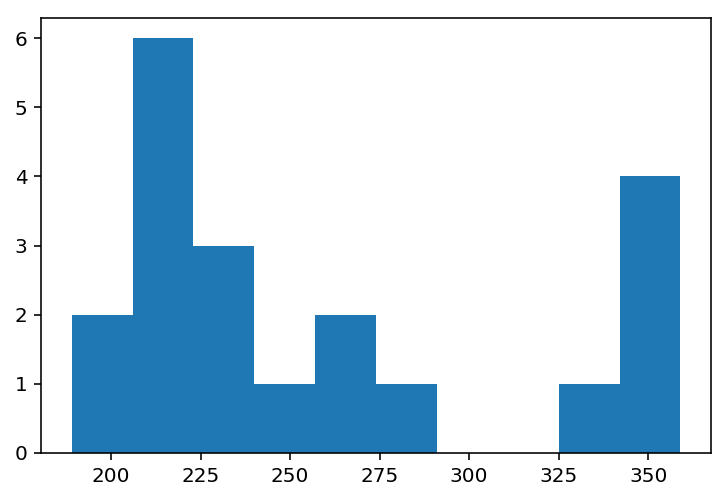

In [17]:
plt.hist(df2.groupby('HomeTeam')['HS'].sum(), bins=10)
plt.show()

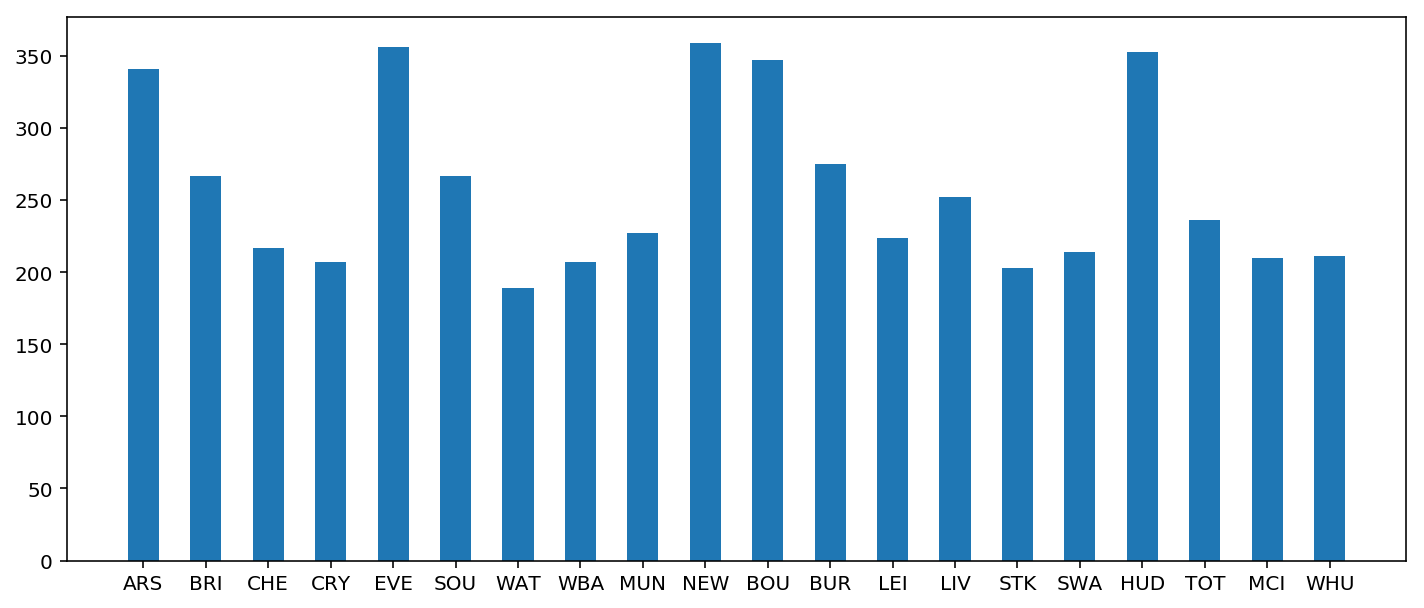

In [18]:
teams = ('Arsenal', 'Brighton', 'Chelsea', 'Crystal Palace', 'Everton',
        'Southampton', 'Watford', 'West Brom', 'Man United', 'Newcastle',
        'Bournemouth', 'Burnley', 'Leicester', 'Liverpool', 'Stoke',
        'Swansea', 'Huddersfield', 'Tottenham', 'Man City', 'West Ham')
teams_Init = ('ARS', 'BRI', 'CHE', 'CRY', 'EVE',
        'SOU', 'WAT', 'WBA', 'MUN', 'NEW',
        'BOU', 'BUR', 'LEI', 'LIV', 'STK',
        'SWA', 'HUD', 'TOT', 'MCI', 'WHU')
ind = np.arange(20)
plt.figure(figsize=(12,5))
plt.bar(ind, df2.groupby('HomeTeam')['HS'].sum(), width=0.5 )
plt.xticks(ind, teams_Init)
plt.show()

In [19]:
df2.groupby('HomeTeam')['HS'].sum()

HomeTeam
Arsenal           341
Bournemouth       267
Brighton          217
Burnley           207
Chelsea           356
Crystal Palace    267
Everton           189
Huddersfield      207
Leicester         227
Liverpool         359
Man City          347
Man United        275
Newcastle         224
Southampton       252
Stoke             203
Swansea           214
Tottenham         353
Watford           236
West Brom         210
West Ham          211
Name: HS, dtype: int64

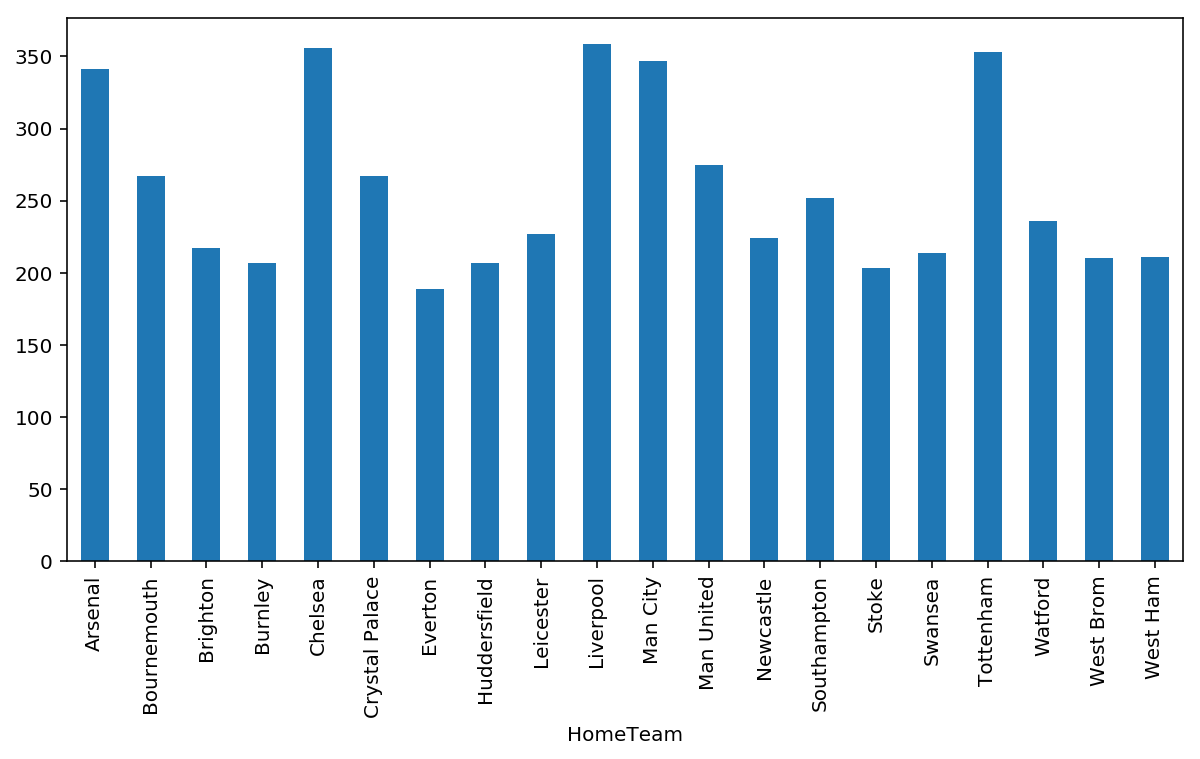

In [20]:
df2.groupby('HomeTeam')['HS'].sum().plot(kind='bar', figsize=(10,5))

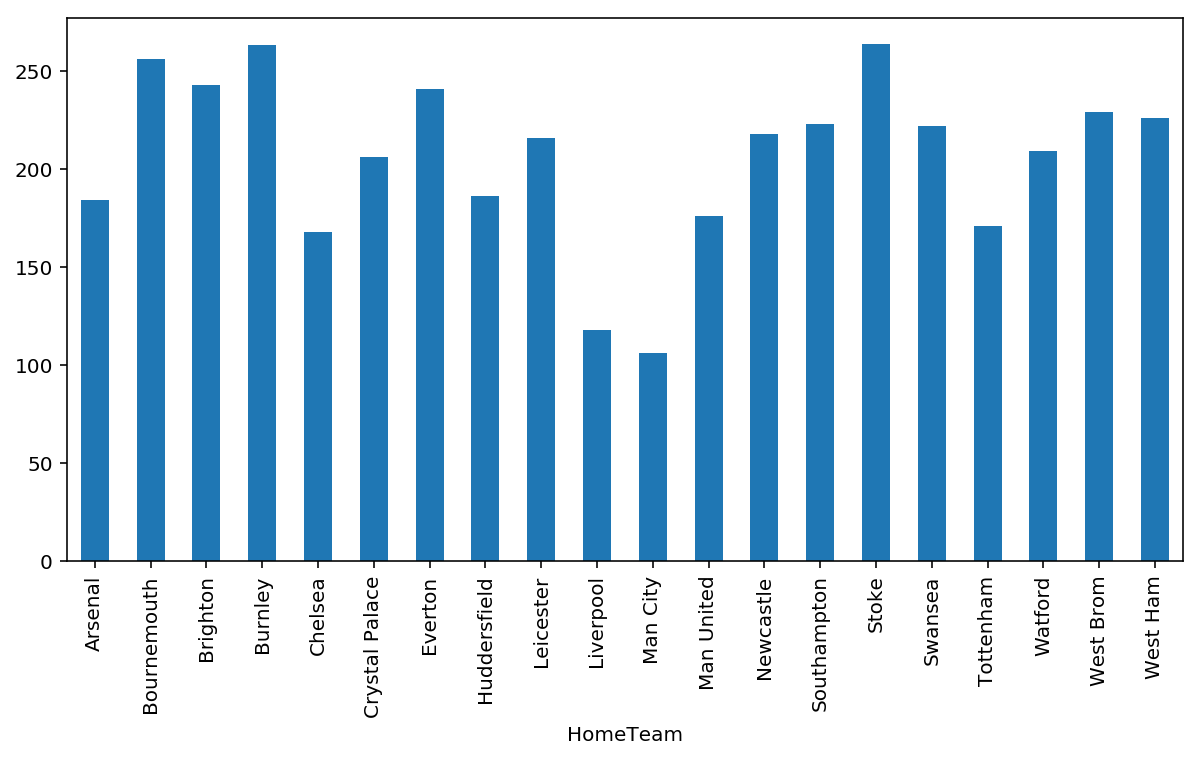

In [21]:
df2.groupby('HomeTeam')['AS'].sum().plot(kind='bar', figsize=(10,5))

In [22]:
df2['shotsDiff'] = df2.HS - df2.AS
df2['shotsonTargetDiff'] = df2.HST - df2.AST
#df2['hitWoodworkDiff'] = df2.HHW - df2.AHW
df2['cornersDiff'] = df2.HC - df2.AC
df2['foulsCommittedDiff'] = df2.HF - df2.AF
#df2['freeKickConcededDiff'] = df2.HFKC - df2.AFKC
#df2['offsideDiff'] = df2.HO - df2.AO
df2['yellowcardDiff'] = df2.HY - df2.AY
df2['redcardDiff'] = df2.HR - df2.AR
df2['bookingptsDiff'] = df2.HBP - df2.ABP

In [23]:
df2.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'HBP', 'ABP', 'FTHGDif', 'HTHGDif',
       'shotsDiff', 'shotsonTargetDiff', 'cornersDiff', 'foulsCommittedDiff',
       'yellowcardDiff', 'redcardDiff', 'bookingptsDiff'],
      dtype='object')

In [24]:
df2.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HBP,ABP,FTHGDif,HTHGDif,shotsDiff,shotsonTargetDiff,cornersDiff,foulsCommittedDiff,yellowcardDiff,redcardDiff,bookingptsDiff
0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0,0,10,1,0,21,7,5,-3,-1,0,-10
1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0,0,20,-2,0,-8,-2,-7,-3,-2,0,-20
2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0,80,30,-1,-3,9,1,3,5,0,2,50
3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0,10,30,-3,-2,6,-2,3,-12,-2,0,-20
4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0,10,10,1,1,0,3,-1,3,0,0,0


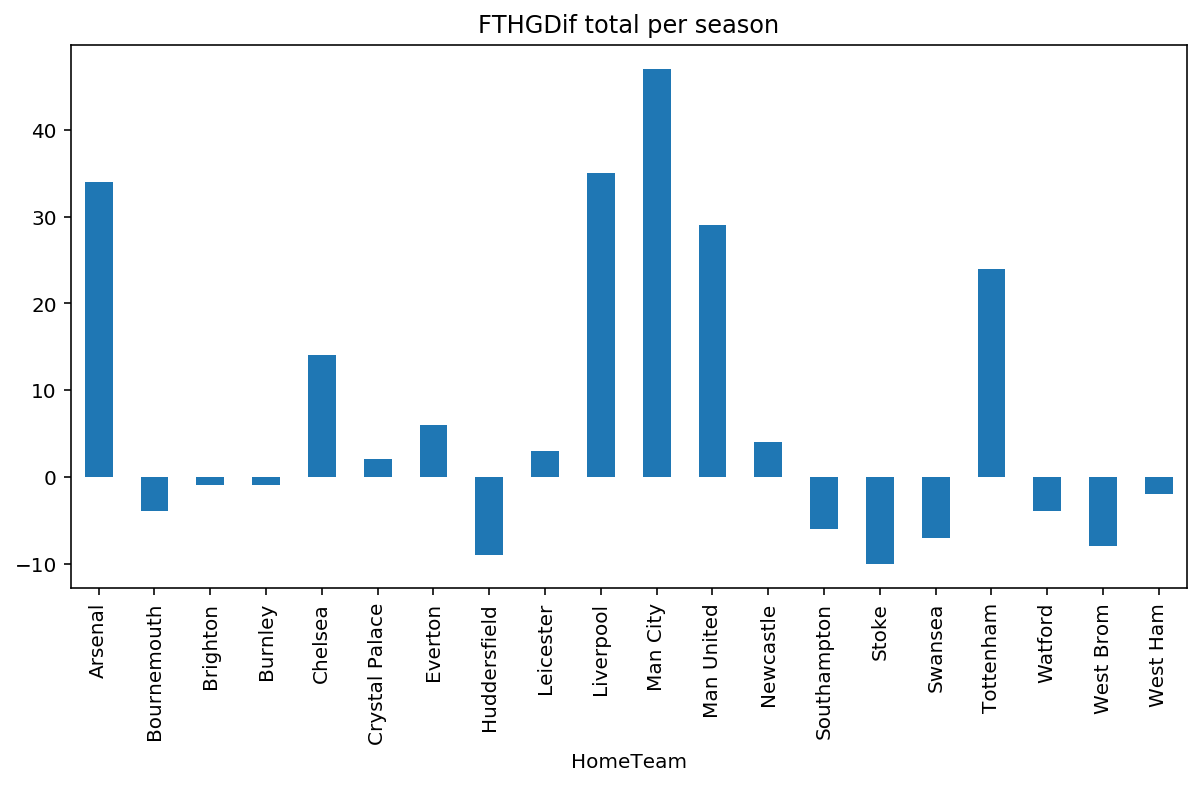

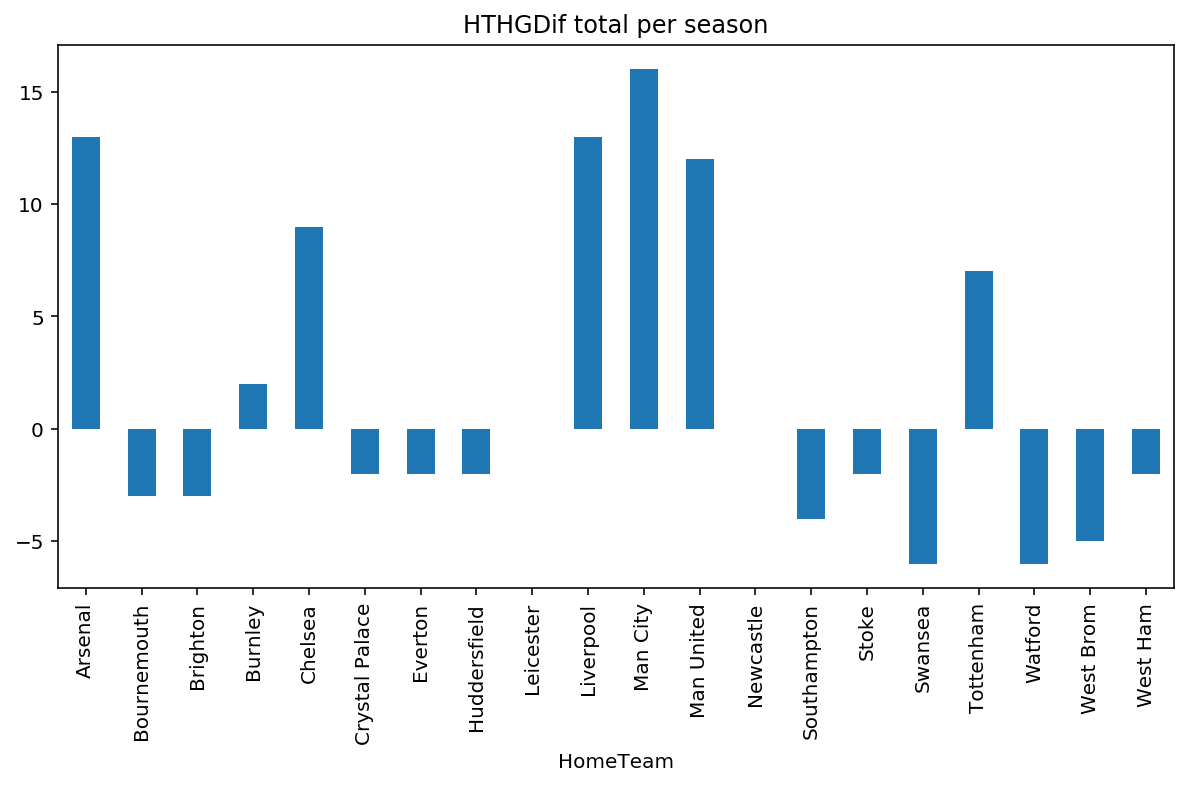

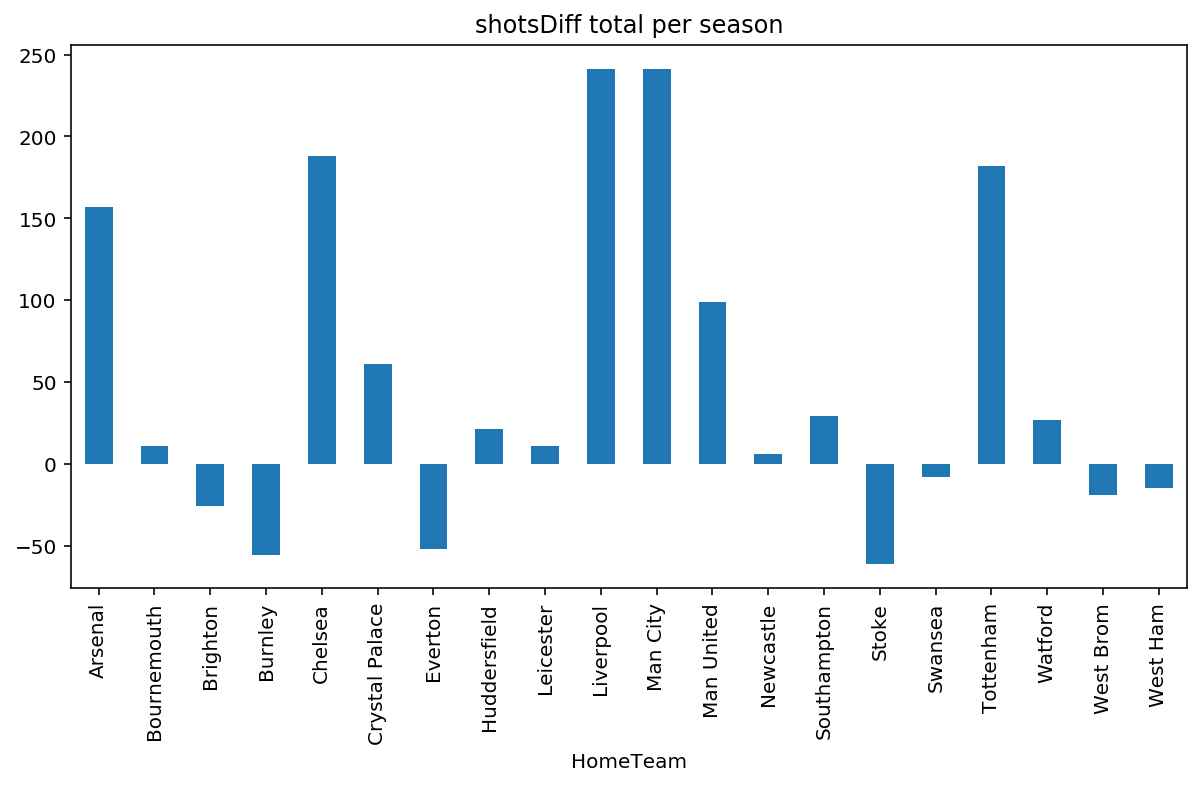

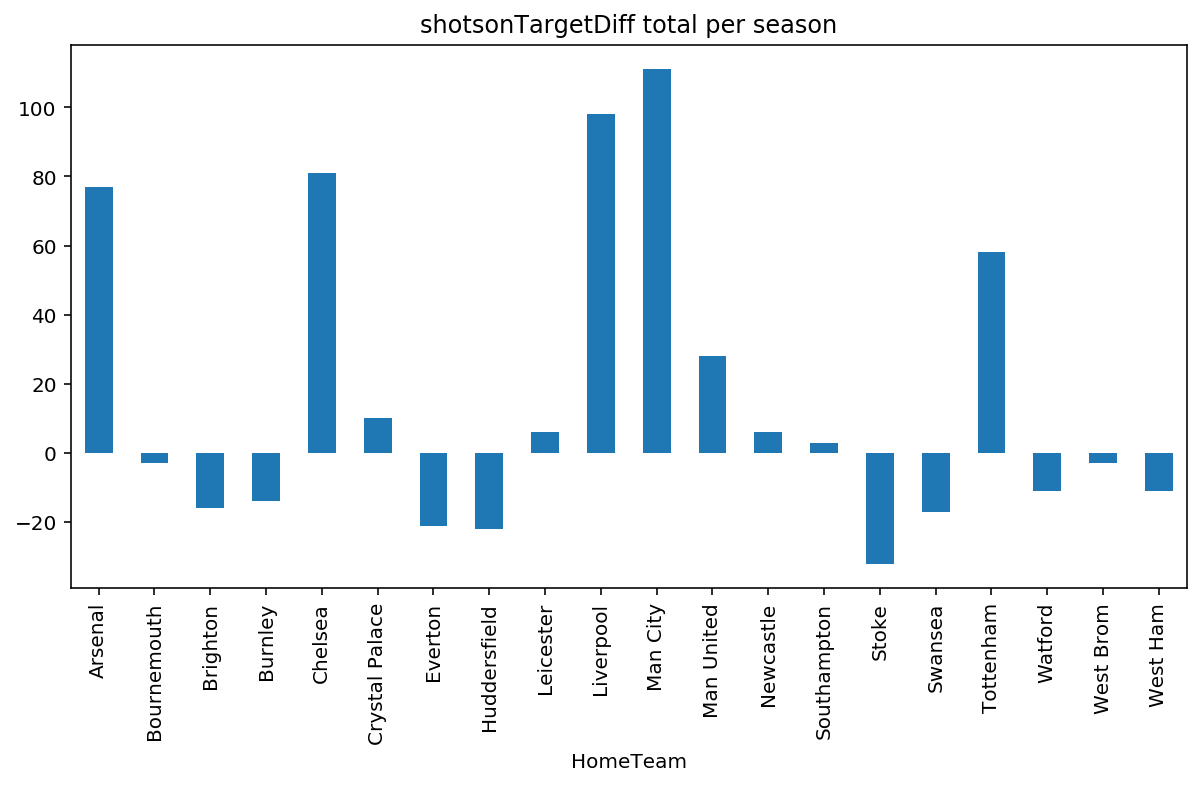

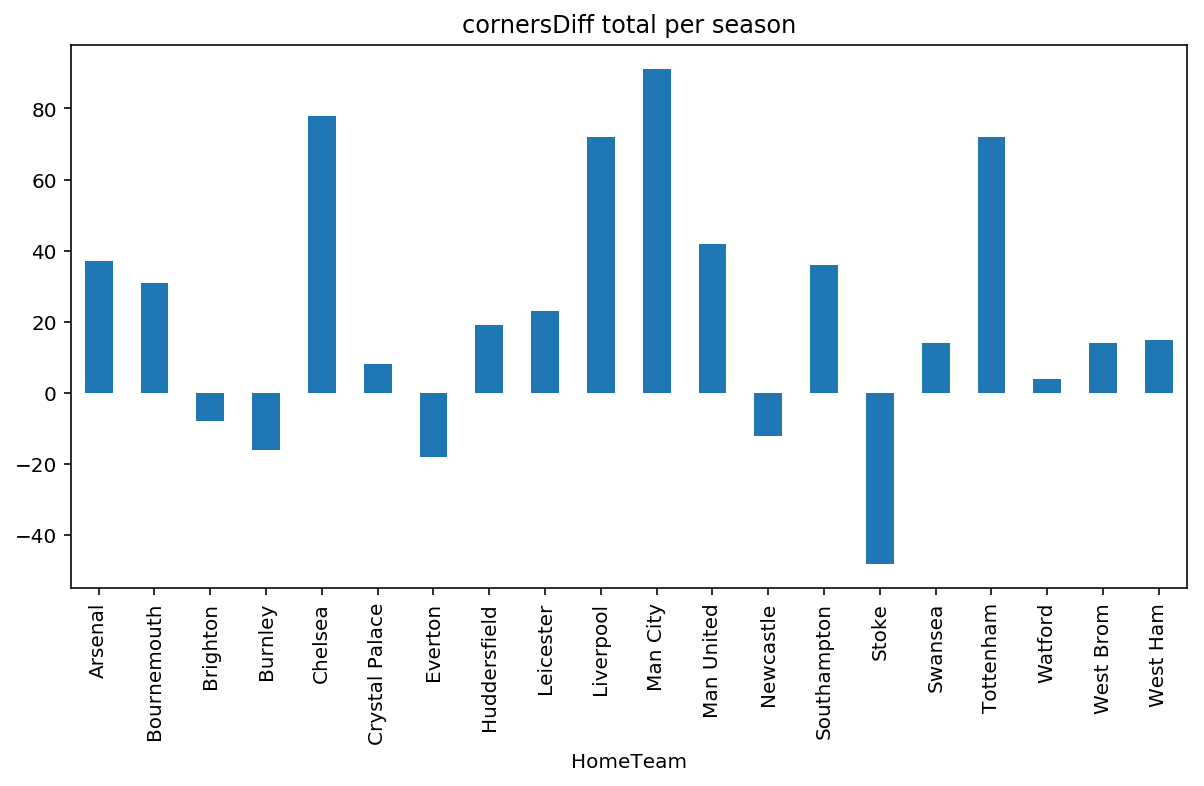

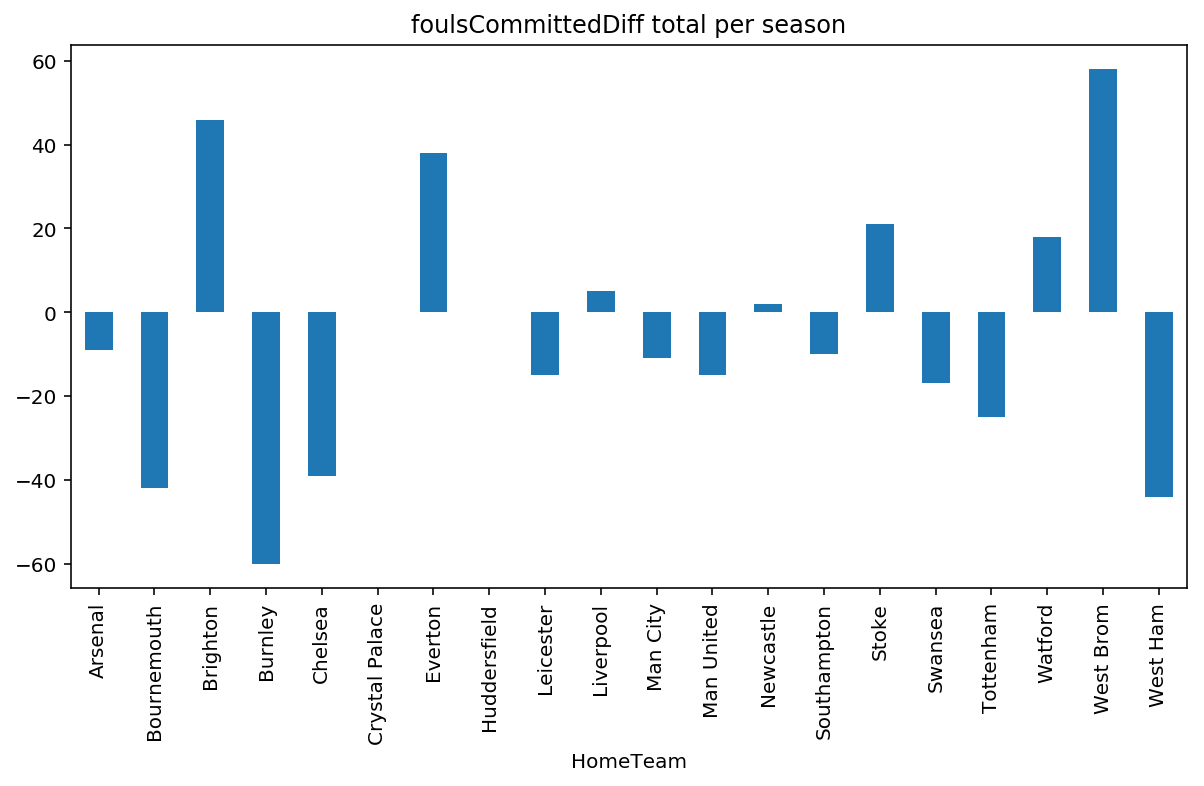

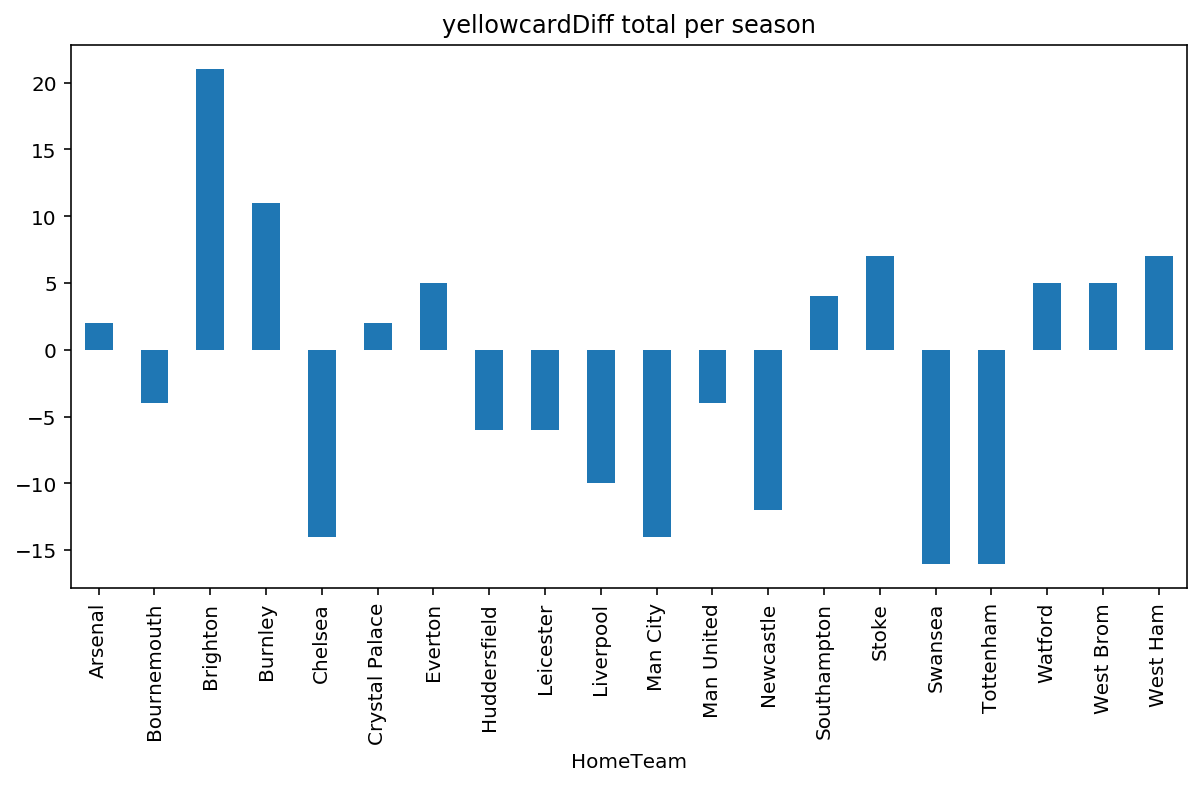

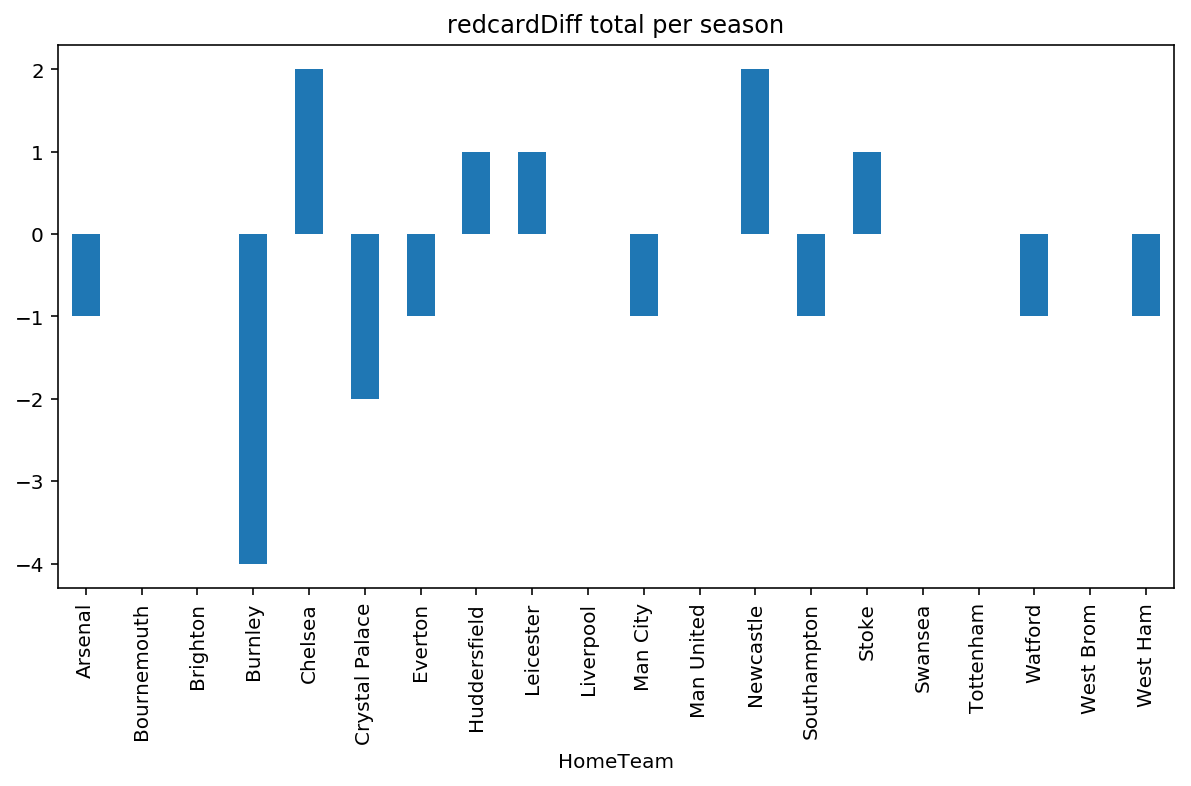

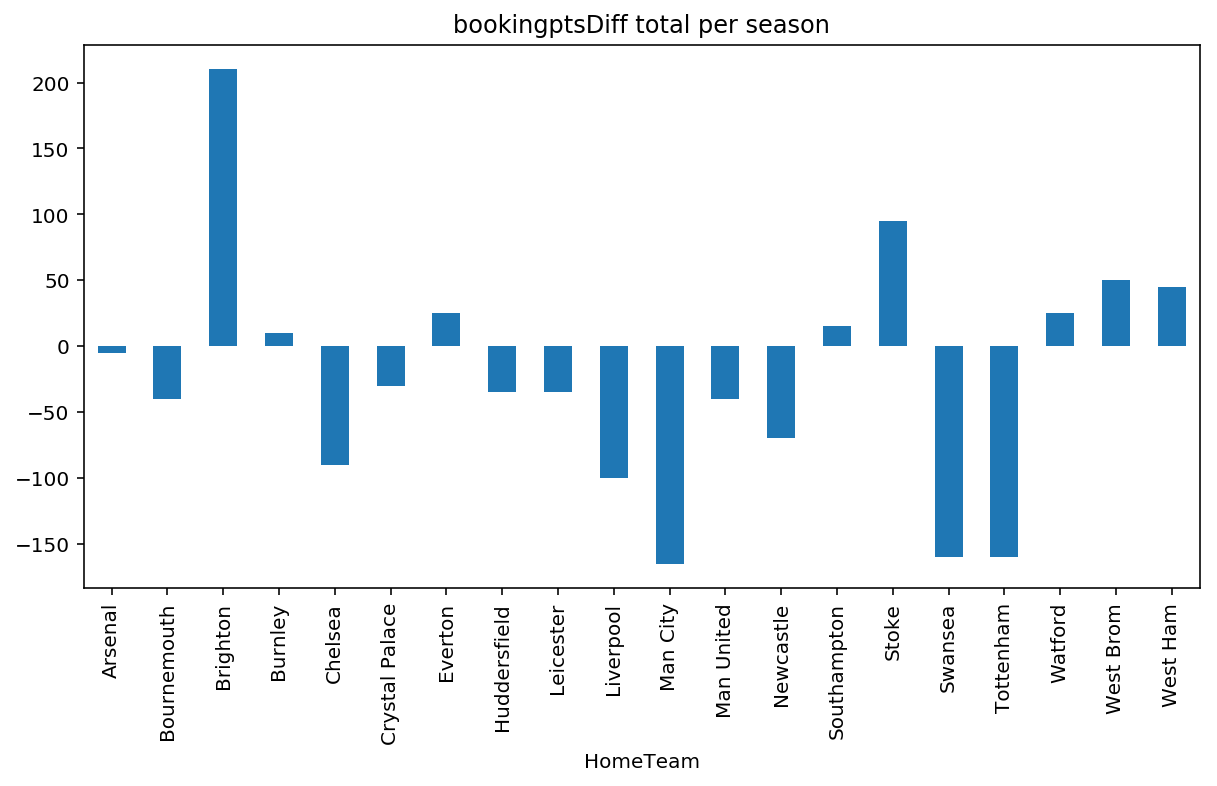

In [25]:
diff_cols = ['FTHGDif', 'HTHGDif','shotsDiff', 'shotsonTargetDiff',
             'cornersDiff', 'foulsCommittedDiff','yellowcardDiff',
             'redcardDiff', 'bookingptsDiff']
for col in diff_cols:
    df2.groupby('HomeTeam')[col].sum().plot(kind='bar', figsize=(10,5))
    plt.title(col + ' total per season')
    plt.show()

In [26]:
diff_cols = ['FTHGDif', 'HTHGDif','shotsDiff', 'shotsonTargetDiff',
             'cornersDiff', 'foulsCommittedDiff','yellowcardDiff',
             'redcardDiff', 'bookingptsDiff']
for col in diff_cols:
    df2[col+'_norm'] = (df2[col] - np.min(df2[col]))/ (np.max(df2[col])  - np.min(df2[col]))

In [27]:
df2.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HBP,ABP,FTHGDif,HTHGDif,shotsDiff,shotsonTargetDiff,cornersDiff,foulsCommittedDiff,yellowcardDiff,redcardDiff,bookingptsDiff,FTHGDif_norm,HTHGDif_norm,shotsDiff_norm,shotsonTargetDiff_norm,cornersDiff_norm,foulsCommittedDiff_norm,yellowcardDiff_norm,redcardDiff_norm,bookingptsDiff_norm
0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0,0,10,1,0,21,7,5,-3,-1,0,-10,0.636364,0.428571,0.826923,0.782609,0.566667,0.482759,0.4,0.333333,0.4
1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0,0,20,-2,0,-8,-2,-7,-3,-2,0,-20,0.363636,0.428571,0.269231,0.391304,0.166667,0.482759,0.3,0.333333,0.3
2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0,80,30,-1,-3,9,1,3,5,0,2,50,0.454545,0.000000,0.596154,0.521739,0.500000,0.758621,0.5,1.000000,1.0
3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0,10,30,-3,-2,6,-2,3,-12,-2,0,-20,0.272727,0.142857,0.538462,0.391304,0.500000,0.172414,0.3,0.333333,0.3
4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0,10,10,1,1,0,3,-1,3,0,0,0,0.636364,0.571429,0.423077,0.608696,0.366667,0.689655,0.5,0.333333,0.5


In [28]:
df2.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'HBP', 'ABP', 'FTHGDif', 'HTHGDif',
       'shotsDiff', 'shotsonTargetDiff', 'cornersDiff', 'foulsCommittedDiff',
       'yellowcardDiff', 'redcardDiff', 'bookingptsDiff', 'FTHGDif_norm',
       'HTHGDif_norm', 'shotsDiff_norm', 'shotsonTargetDiff_norm',
       'cornersDiff_norm', 'foulsCommittedDiff_norm', 'yellowcardDiff_norm',
       'redcardDiff_norm', 'bookingptsDiff_norm'],
      dtype='object')

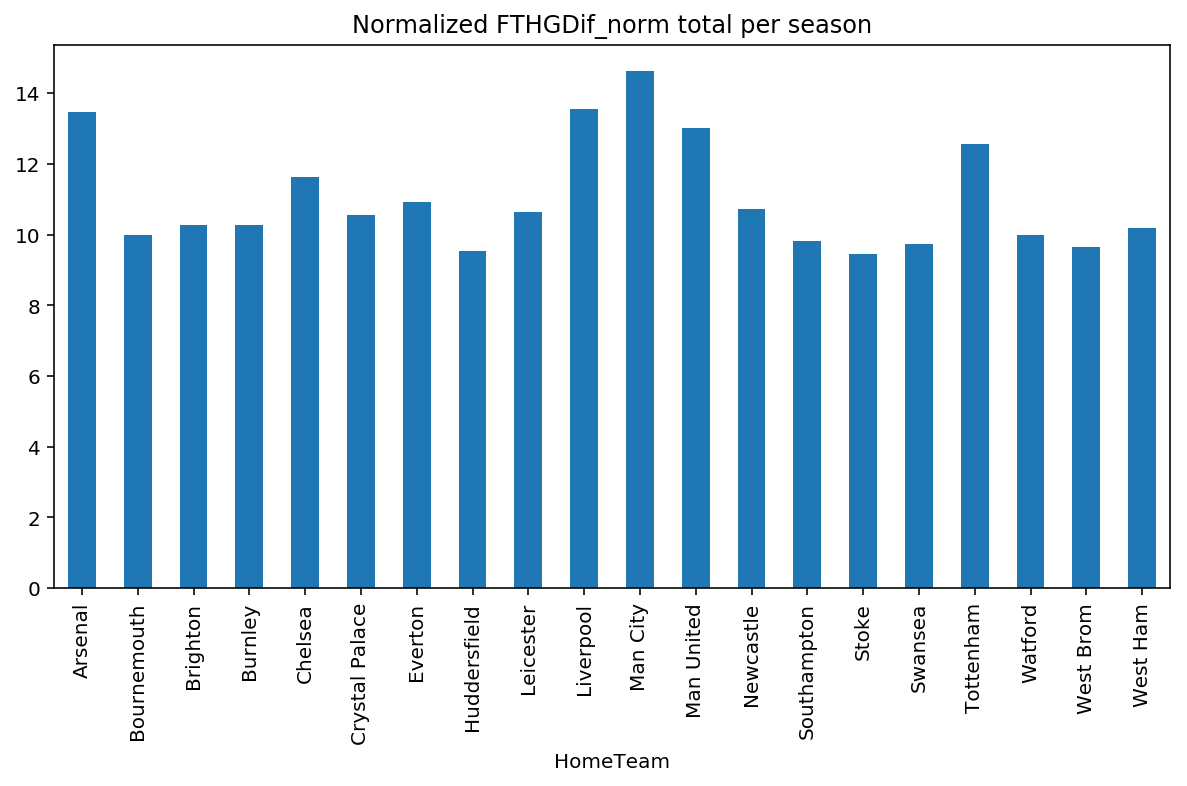

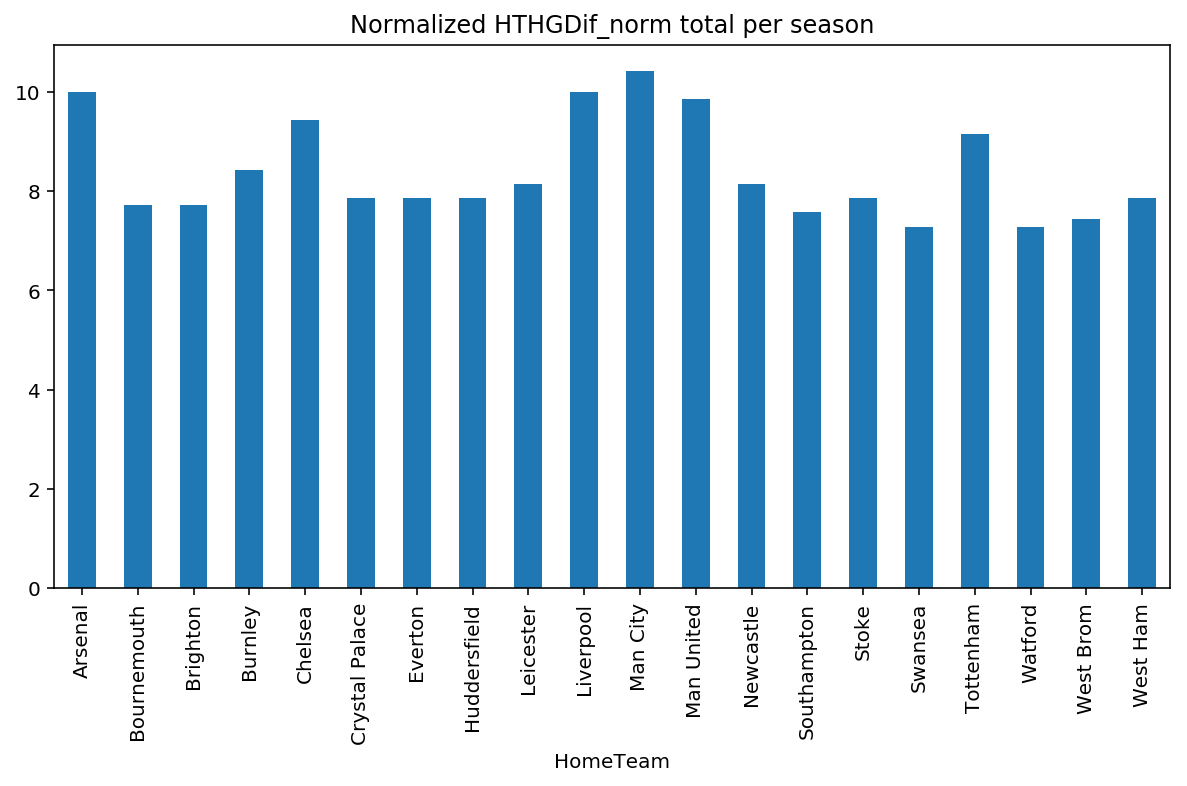

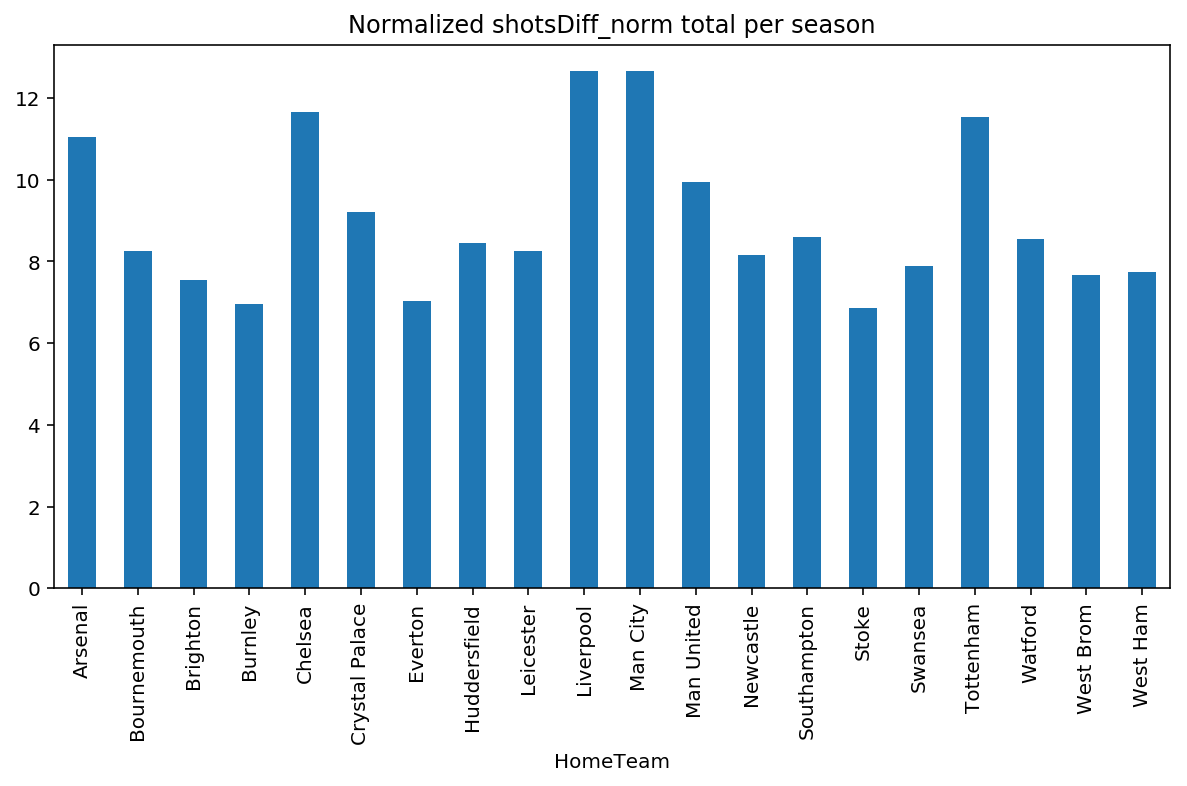

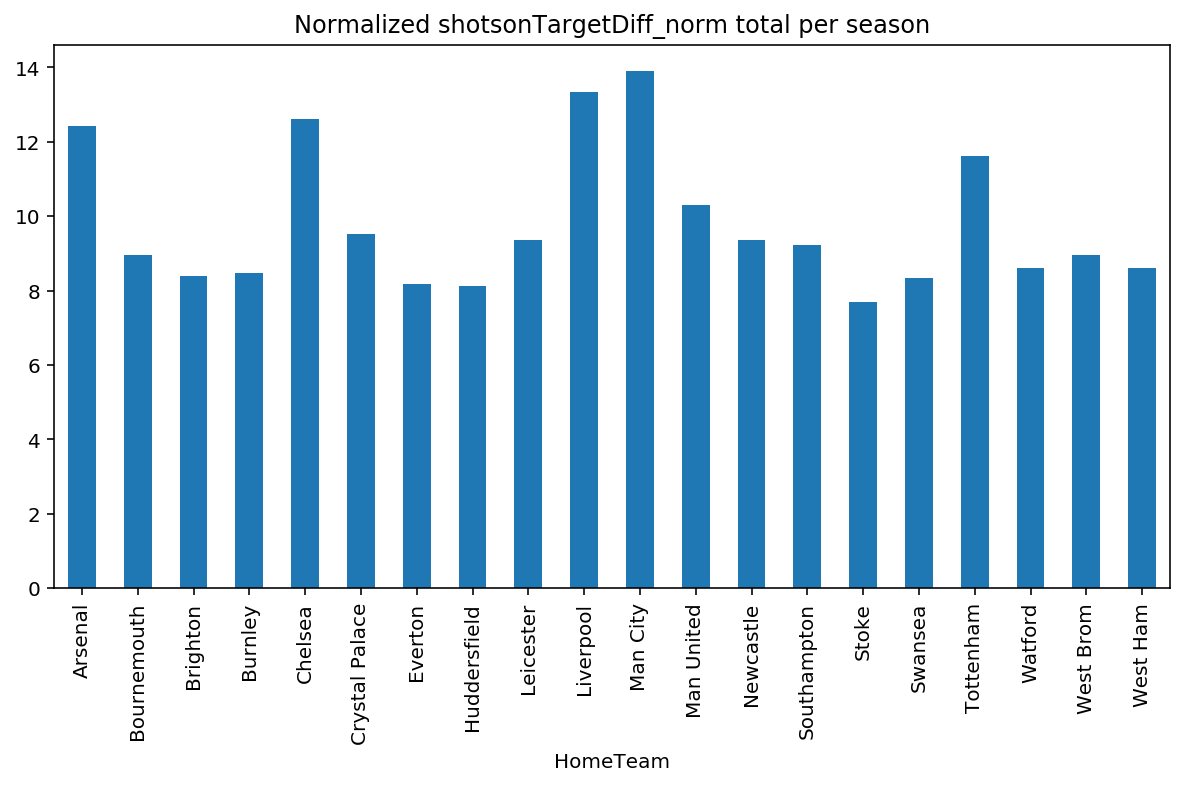

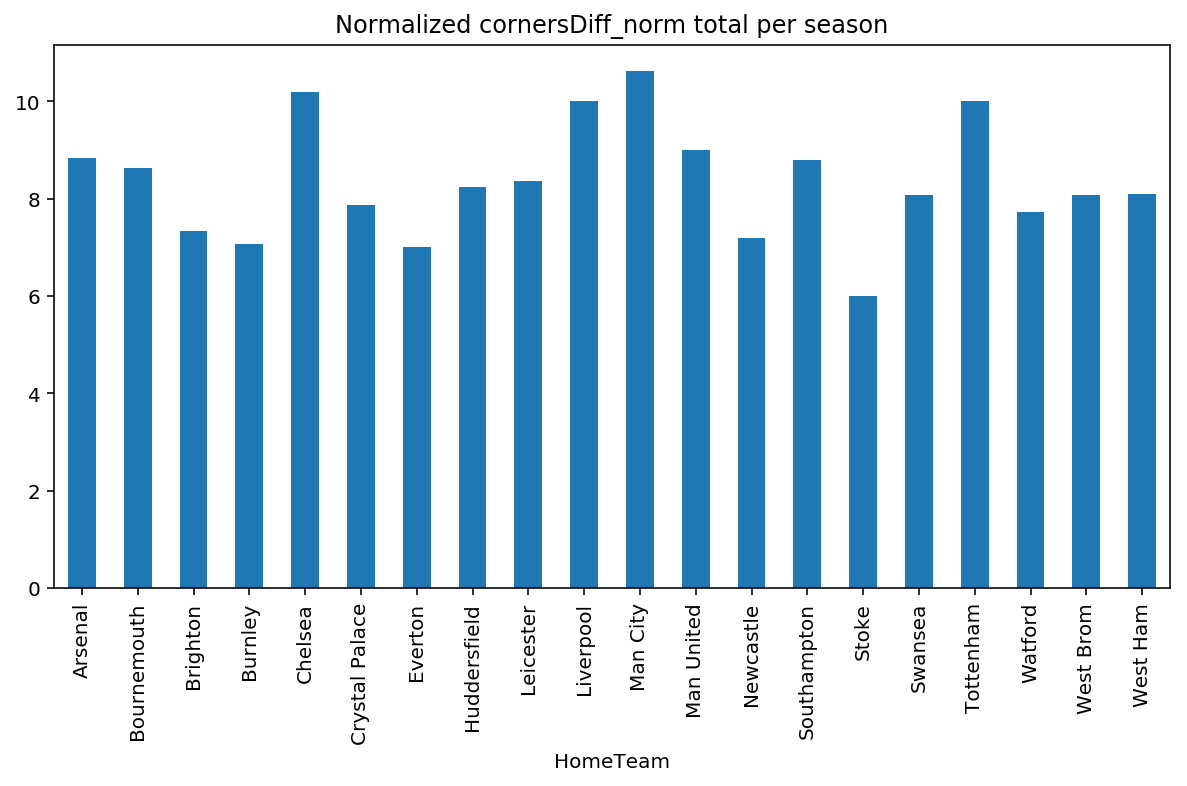

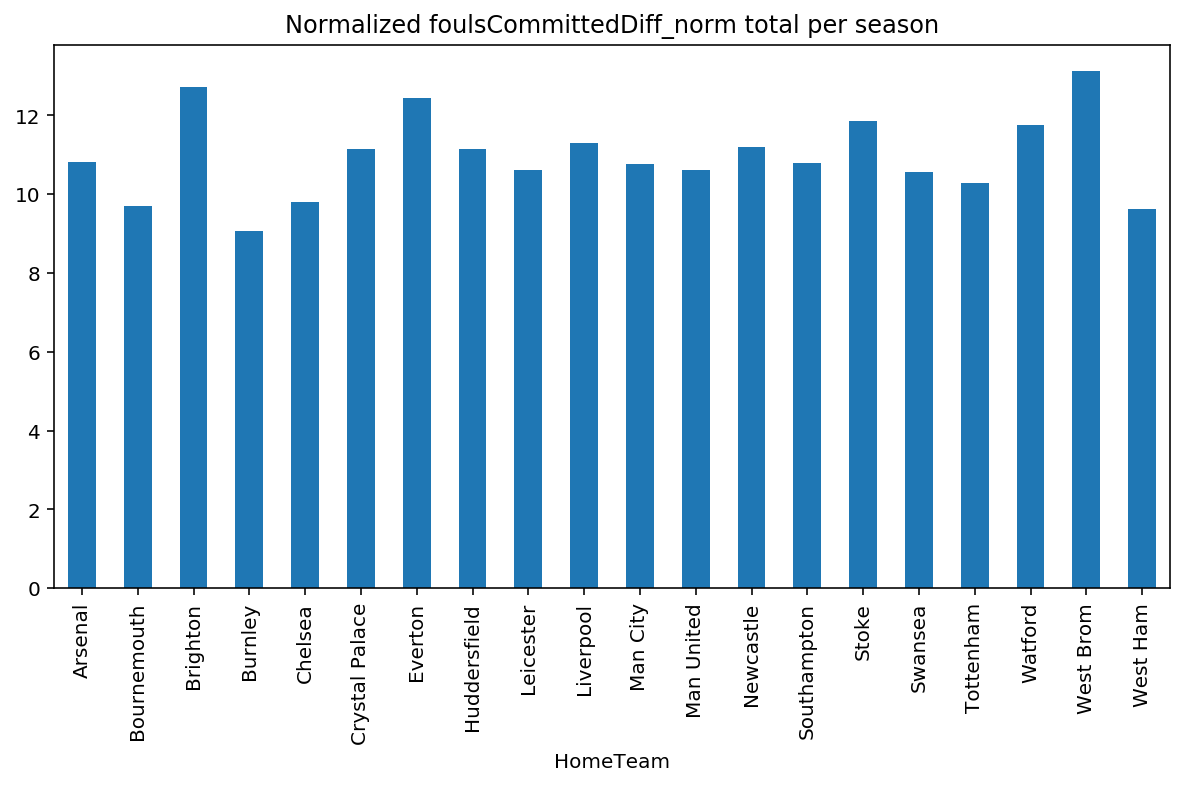

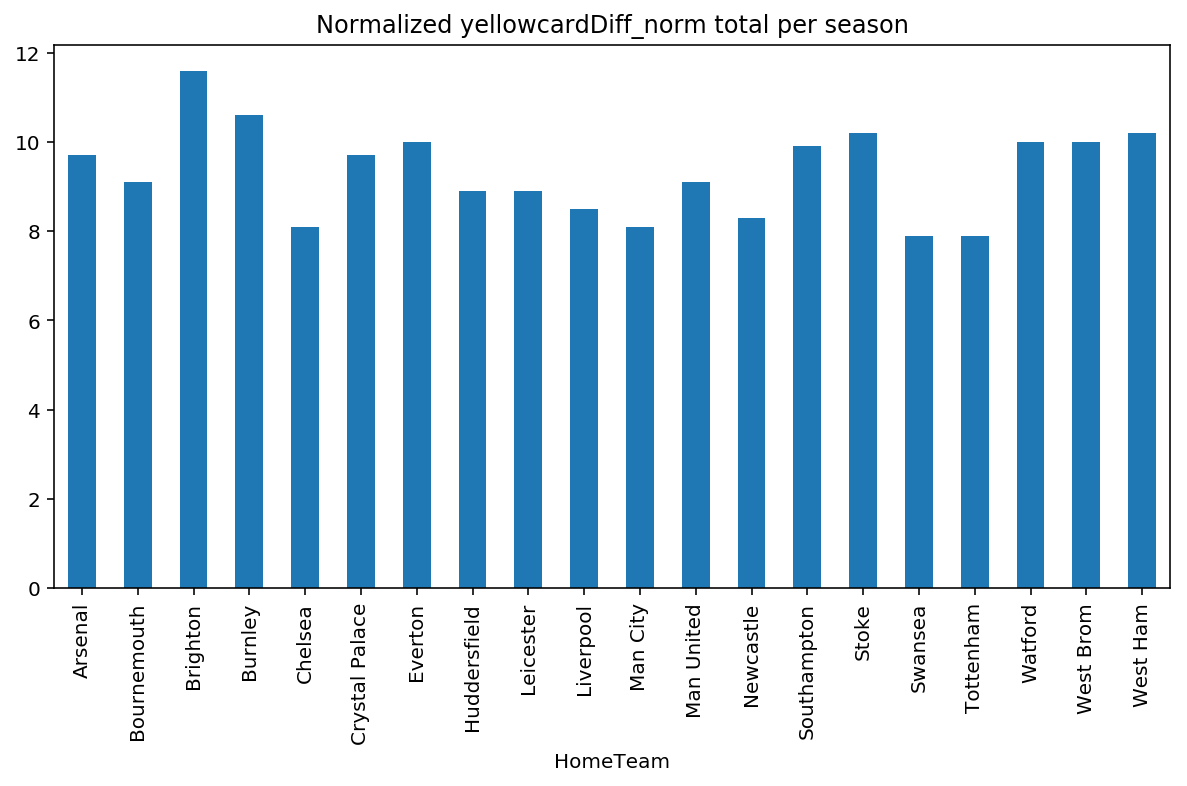

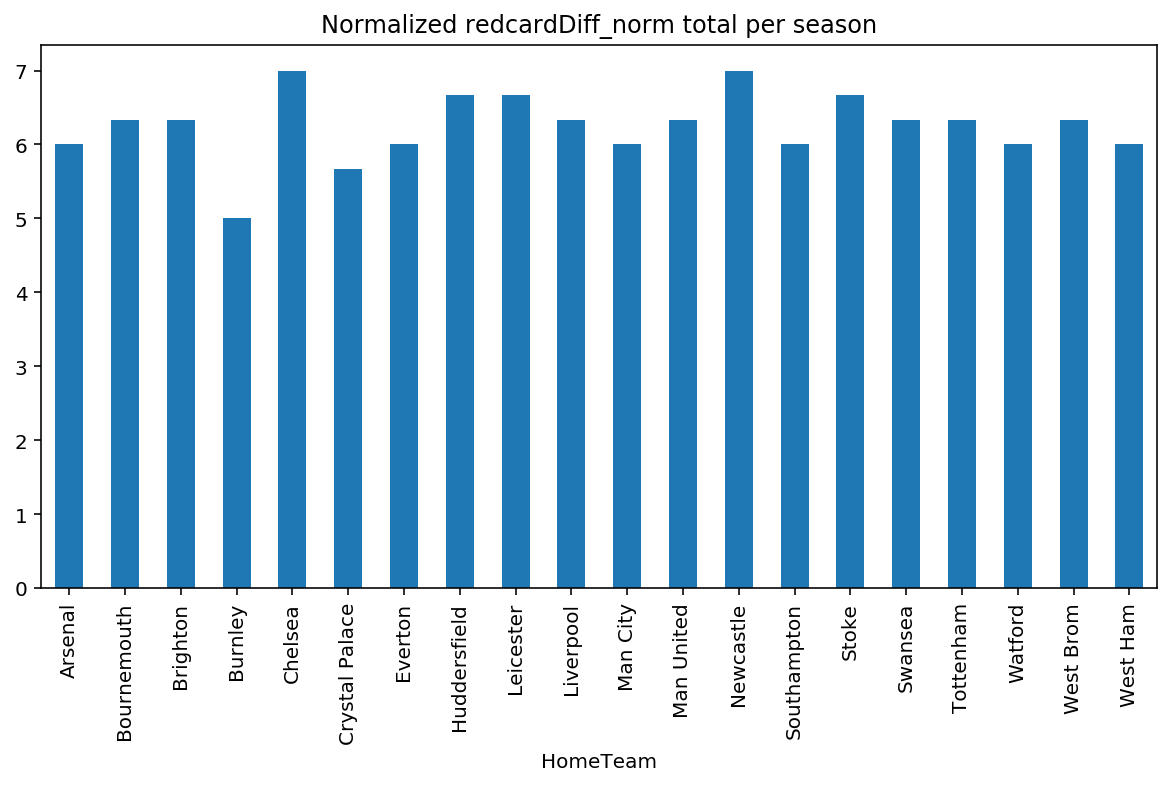

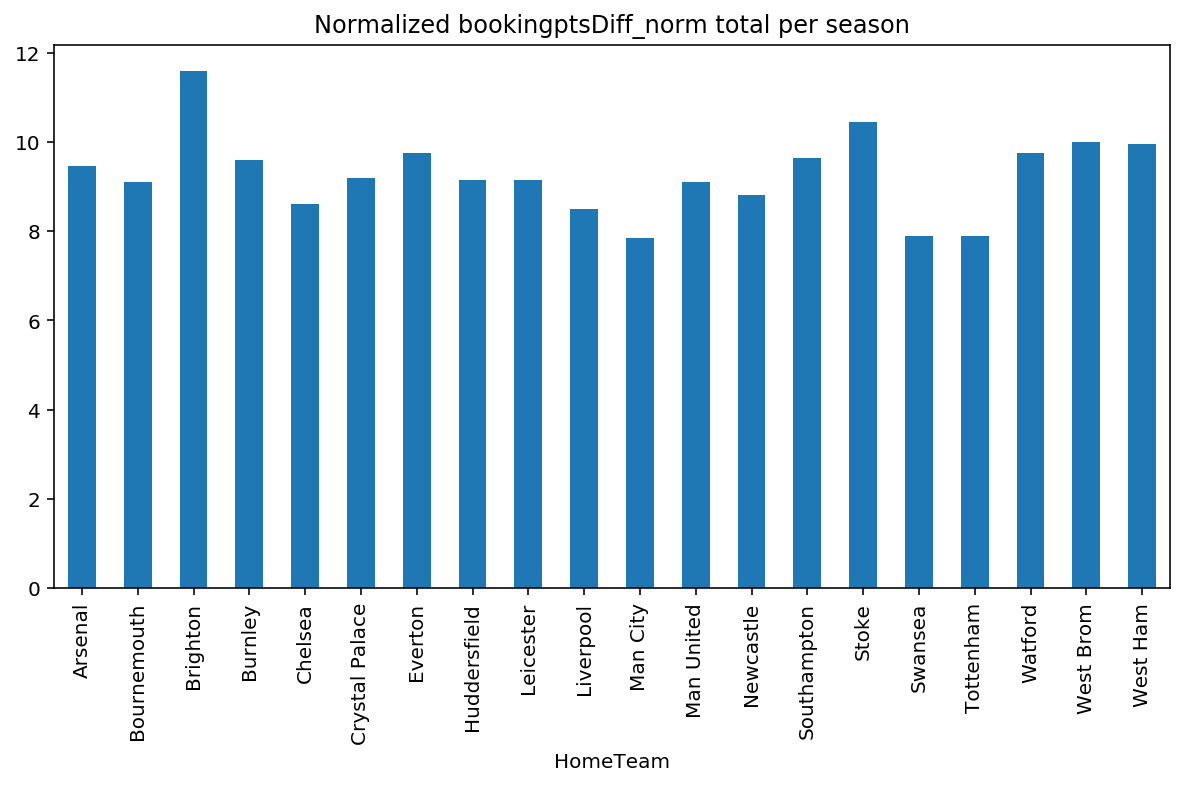

In [29]:
diff_norm_cols = ['FTHGDif_norm',
       'HTHGDif_norm', 'shotsDiff_norm', 'shotsonTargetDiff_norm',
       'cornersDiff_norm', 'foulsCommittedDiff_norm', 'yellowcardDiff_norm',
       'redcardDiff_norm', 'bookingptsDiff_norm']
for col in diff_norm_cols:
    df2.groupby('HomeTeam')[col].sum().plot(kind='bar', figsize=(10,5))
    plt.title('Normalized '+ col + ' total per season')
    plt.show()

In [30]:
FTR_res_key = {'H':1, 'A':-1, 'D':0}
EPL_res_key = {'H':3, 'A':0, 'D':1}

In [47]:
df2[['HomeTeam','AwayTeam','FTR','FTHGDif']].head(10)

,HomeTeam,AwayTeam,FTR,FTHGDif
0,Arsenal,Leicester,H,1
1,Brighton,Man City,A,-2
2,Chelsea,Burnley,A,-1
3,Crystal Palace,Huddersfield,A,-3
4,Everton,Stoke,H,1
5,Southampton,Swansea,D,0
6,Watford,Liverpool,D,0
7,West Brom,Bournemouth,H,1
8,Man United,West Ham,H,4
9,Newcastle,Tottenham,A,-2


In [35]:
#results WRT to the hometeam
df2['result'] = df2['FTR'].map(FTR_res_key)
df2['EPLresult'] = df2['FTR'].map(EPL_res_key)

In [49]:
df2.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HBP,ABP,FTHGDif,HTHGDif,shotsDiff,shotsonTargetDiff,cornersDiff,foulsCommittedDiff,yellowcardDiff,redcardDiff,bookingptsDiff,FTHGDif_norm,HTHGDif_norm,shotsDiff_norm,shotsonTargetDiff_norm,cornersDiff_norm,foulsCommittedDiff_norm,yellowcardDiff_norm,redcardDiff_norm,bookingptsDiff_norm,result,EPLresult
0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0,0,10,1,0,21,7,5,-3,-1,0,-10,0.636364,0.428571,0.826923,0.782609,0.566667,0.482759,0.4,0.333333,0.4,1,3
1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0,0,20,-2,0,-8,-2,-7,-3,-2,0,-20,0.363636,0.428571,0.269231,0.391304,0.166667,0.482759,0.3,0.333333,0.3,-1,0
2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0,80,30,-1,-3,9,1,3,5,0,2,50,0.454545,0.000000,0.596154,0.521739,0.500000,0.758621,0.5,1.000000,1.0,-1,0
3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0,10,30,-3,-2,6,-2,3,-12,-2,0,-20,0.272727,0.142857,0.538462,0.391304,0.500000,0.172414,0.3,0.333333,0.3,-1,0
4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0,10,10,1,1,0,3,-1,3,0,0,0,0.636364,0.571429,0.423077,0.608696,0.366667,0.689655,0.5,0.333333,0.5,1,3


In [41]:
df2.groupby('HomeTeam')['result','EPLresult'].sum().sort_values('EPLresult', ascending=False)

,result,EPLresult
HomeTeam,,
Man City,15,50
Man United,13,47
Arsenal,13,47
Tottenham,11,43
Liverpool,12,43
Chelsea,7,37
Everton,5,34
Brighton,3,29
Newcastle,1,28


In [45]:
df2.groupby('AwayTeam')['result','EPLresult'].sum().sort_values('EPLresult', ascending=False)

,result,EPLresult
AwayTeam,,
Brighton,10,41
Watford,9,41
West Brom,9,40
Swansea,9,39
Huddersfield,8,38
Arsenal,7,37
Newcastle,7,37
Stoke,8,37
West Ham,7,36


In [44]:
df2.groupby(['HomeTeam','AwayTeam'])['FTR','result','EPLresult'].sum()

result  EPLresult
HomeTeam       AwayTeam                         
Arsenal        Bournemouth          1          3
               Brighton             1          3
               Burnley              1          3
               Chelsea              0          1
               Crystal Palace       1          3
               Everton              1          3
               Huddersfield         1          3
               Leicester            1          3
               Liverpool            0          1
               Man City            -1          0
               Man United          -1          0
               Newcastle            1          3
               Southampton          1          3
               Stoke                1          3
               Swansea              1          3
               Tottenham            1          3
               Watford              1          3
               West Brom            1          3
               West Ham             1          3
Bournemouth    Arsenal              1          3
               Brighton             1          3
               Burnley             -1          0
               Chelsea             -1          0
               Crystal Palace       0          1
               Everton              1          3
               Huddersfield         1          3
               Leicester            0          1
               Liverpool           -1          0
               Man City            -1          0
               Man United          -1          0
               Newcastle            0          1
               Southampton          0          1
               Stoke                1          3
               Swansea              1          3
               Tottenham           -1          0
               Watford             -1          0
               West Brom            1          3
               West Ham             0          1
Brighton       Arsenal              1          3
               Bournemouth          0          1
               Burnley              0          1
               Chelsea             -1          0
               Crystal Palace       0          1
               Everton              0          1
               Huddersfield         0          1
               Leicester           -1          0
               Liverpool           -1          0
               Man City            -1          0
               Man United           1          3
               Newcastle            1          3
               Southampton          0          1
               Stoke                0          1
               Swansea              1          3
               Tottenham            0          1
               Watford              1          3
               West Brom            1          3
               West Ham             1          3
Burnley        Arsenal             -1          0
               Bournemouth         -1          0
               Brighton             0          1
               Chelsea             -1          0
               Crystal Palace       1          3
               Everton              1          3
               Huddersfield         0          1
               Leicester            1          3
               Liverpool           -1          0
               Man City             0          1
               Man United          -1          0
               Newcastle            1          3
               Southampton          0          1
               Stoke                1          3
               Swansea              1          3
               Tottenham           -1          0
               Watford              1          3
               West Brom           -1          0
               West Ham             0          1
Chelsea        Arsenal              0          1
               Bournemouth         -1          0
               Brighton             1          3
               Burnley             -1          0
             

In [48]:
df2[['HomeTeam','AwayTeam','FTR','FTHGDif']].head(10)

,HomeTeam,AwayTeam,FTR,FTHGDif
0,Arsenal,Leicester,H,1
1,Brighton,Man City,A,-2
2,Chelsea,Burnley,A,-1
3,Crystal Palace,Huddersfield,A,-3
4,Everton,Stoke,H,1
5,Southampton,Swansea,D,0
6,Watford,Liverpool,D,0
7,West Brom,Bournemouth,H,1
8,Man United,West Ham,H,4
9,Newcastle,Tottenham,A,-2


In [54]:
teams = ('Arsenal', 'Brighton', 'Chelsea', 'Crystal Palace', 'Everton',
        'Southampton', 'Watford', 'West Brom', 'Man United', 'Newcastle',
        'Bournemouth', 'Burnley', 'Leicester', 'Liverpool', 'Stoke',
        'Swansea', 'Huddersfield', 'Tottenham', 'Man City', 'West Ham')
points_tally = {}
for team in teams:
    if df2.HomeTeam == team & df2[df2.HomeTeam == team]['FTHGDif'] > 0:
        points_tally[team] +=3
    elif df2.HomeTeam == team & df2[df2.HomeTeam == team]['FTHGDif'] == 0:
        points_tally[team] +=1
    elif df2.HomeTeam == team & df2[df2.HomeTeam == team]['FTHGDif'] < 0:
        points_tally[team] +=0
    elif df2.AwayTeam == team & df2[df2.AwayTeam == team]['FTHGDif'] < 0:
        points_tally[team] +=3
    elif df2.AwayTeam == team & df2[df2.AwayTeam == team]['FTHGDif'] == 0:
        points_tally[team] +=1
    elif df2.AwayTeam == team & df2[df2.AwayTeam == team]['FTHGDif'] > 0:
        points_tally[team] +=0
print(points_tally)

TypeError: cannot compare a dtyped [int64] array with a scalar of type [bool]